<a href="https://colab.research.google.com/github/chasuke2008/chatbot_app/blob/main/DLtest1_%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E3%81%A3%E3%81%A6%E3%81%AA%E3%81%AB%EF%BC%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

パイソン３年生

# **第1章 ディープラーニングってなに？**

リスト1-2 数字の画像認識をするニューラルネットワーク
手書き数字の形を学習し、別の「数字の画像データ」を渡して「それが何の数字かを予測」します。

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=50,
          validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8783 - loss: 0.4232 - val_accuracy: 0.9605 - val_loss: 0.1322
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9640 - loss: 0.1222 - val_accuracy: 0.9685 - val_loss: 0.0970
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9767 - loss: 0.0787 - val_accuracy: 0.9756 - val_loss: 0.0821
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9827 - loss: 0.0562 - val_accuracy: 0.9742 - val_loss: 0.0905
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9878 - loss: 0.0424 - val_accuracy: 0.9796 - val_loss: 0.0691
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9903 - loss: 0.0323 - val_accuracy: 0.9797 - val_loss: 0.0702
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9923 - loss: 0.0254 - val_accuracy: 0.9808 - val_loss: 0.0715
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9936 - loss: 0.02

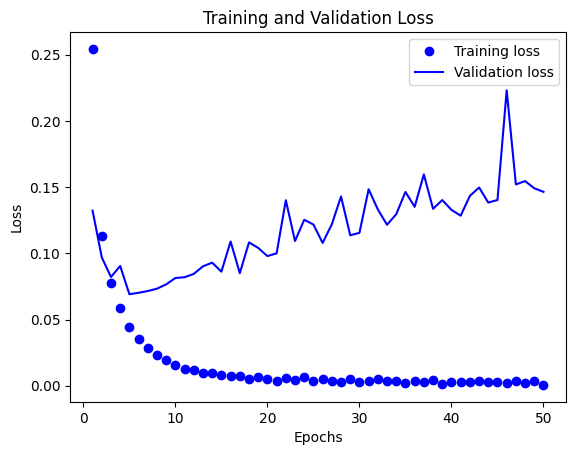

In [ ]:
import matplotlib.pyplot as plt

# 訓練誤差と検証誤差を取得
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# エポック数を取得
epochs = range(1, len(train_loss) + 1)

# 誤差のプロット
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training loss**：訓練誤差、学習の誤差です。同じデータを使っているので学習が進むにつれ精度が上がります。

**Validation Loss**: 検証データを用いた評価。学習には使われていないので、一般的なデータを評価したものと考えられる。

最初の頃は、Epoch数（学習回数）が増えるにつれ両方の数値が下がっていきます。しかし、5回過ぎからValidation Lossが減るどころか増える傾向にあります。過学習と考えられます。（50回くらい学習するとより明らかです）

リスト1-3

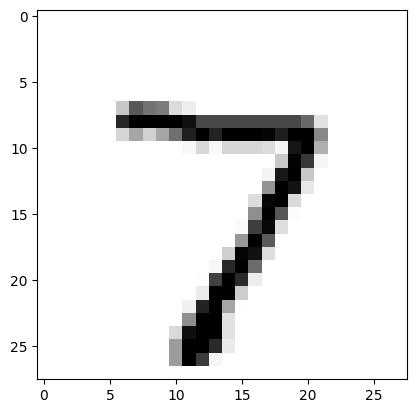

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
この画像は「7」です。 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_test[0], cmap="Greys")
plt.show()
pre = model.predict(x_test)
index = np.argmax(pre[0])
print(f"この画像は「{index}」です。 ")